<a href="https://colab.research.google.com/github/vidakpop/EGH-machine-learning/blob/main/ECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.utils import to_categorical
import csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/ECG

/content/drive/MyDrive/ECG


In [4]:
# Loading the train_features dataset
train_features = pd.read_csv('/content/drive/MyDrive/ECG/train_feat.csv')

train_features


,ID,Type,F0,F1,F2,F3,F4,F5,F6,F7,...,F178,F179,F180,F181,F182,F183,F184,F185,F186,F187
0,B00000,O,-7,9,2,0,1,3,0.018661,0.033087,...,0.261922,5.374833,-0.244051,6,0,66.518847,0,67.529544,70.754717,0.936
1,B00001,O,16,0,18,1,1,3,0.340250,0.542241,...,0.334393,11.151970,2.338377,8,0,66.518847,2,94.637224,153.061225,1.288
2,B00002,O,-27,27,0,0,0,0,0.065454,0.024133,...,0.118206,6.579651,1.270140,14,0,92.592593,0,108.794198,122.950820,0.680
3,B00003,N,-24,24,0,0,0,0,0.015118,0.008164,...,0.043204,17.917860,3.454199,2,0,80.645161,0,83.160083,86.206897,0.768
4,B00004,N,-10,10,0,0,0,0,0.015908,0.018113,...,0.183005,5.296747,-0.352397,0,0,61.983471,0,66.777963,133.928571,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,B13057,O,-18,23,5,0,0,5,0.161450,0.237281,...,0.077294,5.916586,1.252208,3,0,105.633803,2,115.606936,144.230769,0.632
13058,B13058,N,-10,10,0,0,0,0,0.021888,0.024356,...,0.027867,10.497985,-1.699792,0,0,72.815534,0,74.303406,77.319588,0.840
13059,B13059,N,6,0,6,0,1,3,0.053318,0.063844,...,0.014093,12.938589,2.101655,12,0,73.891626,0,81.466395,86.206897,0.848
13060,B13060,N,-18,18,0,0,0,0,0.031714,0.010810,...,0.122079,13.930808,2.633927,0,0,62.240664,0,65.111232,68.181818,0.976


In [5]:
# Loading the train_signals dataset
train_signals = pd.read_csv('/content/drive/MyDrive/ECG/train_signal.csv')
train_signals

,ID,Type,X0,X1,X2,X3,X4,X5,X6,X7,...,X5990,X5991,X5992,X5993,X5994,X5995,X5996,X5997,X5998,X5999
0,B00000,O,-0.788,-0.846,-0.897,-0.941,-0.977,-1.021,-1.050,-1.079,...,0.027,0.034,0.034,0.041,0.041,0.041,0.048,0.056,0.063,0.070
1,B00001,O,-0.221,-0.315,-0.415,-0.491,-0.560,-0.629,-0.685,-0.741,...,-0.196,-0.271,-0.365,-0.478,-0.597,-0.710,-0.829,-0.917,-0.961,-0.986
2,B00002,O,1.659,1.881,2.250,2.634,2.804,2.908,2.967,2.952,...,-0.343,-0.284,-0.180,0.012,0.226,0.315,0.381,0.425,0.448,0.470
3,B00003,N,-0.072,-0.066,-0.060,-0.049,-0.032,-0.021,-0.009,0.002,...,-0.260,-0.255,-0.243,-0.232,-0.226,-0.226,-0.226,-0.226,-0.226,-0.220
4,B00004,N,-0.035,-0.026,-0.017,-0.004,0.000,0.009,0.009,0.013,...,0.009,0.004,-0.004,-0.009,-0.013,-0.022,-0.026,-0.026,-0.031,-0.031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,B13057,O,-0.176,-0.176,-0.108,-0.040,0.041,0.055,-0.013,-0.094,...,-0.568,-0.541,-0.541,-0.555,-0.568,-0.582,-0.595,-0.595,-0.528,-0.419
13058,B13058,N,0.473,0.454,0.429,0.327,0.085,-0.328,-0.926,-1.708,...,0.543,0.530,0.518,0.505,0.492,0.473,0.460,0.448,0.435,0.429
13059,B13059,N,0.392,0.498,0.577,0.627,0.660,0.694,0.711,0.722,...,0.342,0.342,0.342,0.347,0.347,0.347,0.347,0.342,0.336,0.336
13060,B13060,N,0.122,0.150,0.177,0.195,0.213,0.231,0.240,0.258,...,-0.539,-0.530,-0.521,-0.512,-0.494,-0.484,-0.457,-0.439,-0.412,-0.385


In [6]:
# Loading the test_features dataset
test_features = pd.read_csv('/content/drive/MyDrive/ECG/test_feat.csv')
test_features

,ID,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F178,F179,F180,F181,F182,F183,F184,F185,F186,F187
0,C00000,-10,10,0,0,0,0,0.035030,0.025541,0.026757,...,0.260381,5.692895,0.780536,0,0,52.173913,0,53.428317,59.055118,1.168
1,C00001,-1,1,0,0,0,0,0.065561,0.052112,0.070092,...,0.153337,22.404452,3.854612,0,0,48.154093,0,0.000000,56.818182,1.304
2,C00002,-25,25,0,0,0,0,0.004268,0.007249,0.008490,...,0.003731,11.355926,2.649366,7,0,83.333333,0,84.447572,87.209302,0.744
3,C00003,16,0,16,0,1,10,0.091563,0.152688,0.194351,...,0.026470,22.279271,-4.135135,3,0,66.371681,0,71.471114,89.285714,0.944
4,C00004,-34,34,0,0,0,0,0.032833,0.007840,0.009507,...,0.268580,6.582272,0.501846,0,0,106.761566,0,115.273775,120.967742,0.576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,C03995,34,0,34,0,1,12,0.257070,0.382671,0.401493,...,0.014037,13.499831,3.057967,5,0,103.448276,8,133.928571,178.571429,0.704
3996,C03996,-4,8,4,0,0,3,0.130805,0.205248,0.163456,...,0.146989,18.188955,-2.744242,0,0,55.970149,0,59.347181,125.000000,1.184
3997,C03997,27,0,27,0,3,13,0.502131,0.786888,0.884271,...,0.056684,3.645347,0.011702,28,0,90.090090,20,146.699266,202.702703,0.944
3998,C03998,-1,2,1,0,0,1,0.033182,0.035032,0.044967,...,0.159070,9.421713,-0.581112,0,0,69.124424,0,71.985603,76.530612,0.888


In [7]:
# Removing the 'Type' column from the train_features dataset
train_features.drop('Type', axis=1, inplace=True)
train_features

,ID,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F178,F179,F180,F181,F182,F183,F184,F185,F186,F187
0,B00000,-7,9,2,0,1,3,0.018661,0.033087,0.038109,...,0.261922,5.374833,-0.244051,6,0,66.518847,0,67.529544,70.754717,0.936
1,B00001,16,0,18,1,1,3,0.340250,0.542241,0.598017,...,0.334393,11.151970,2.338377,8,0,66.518847,2,94.637224,153.061225,1.288
2,B00002,-27,27,0,0,0,0,0.065454,0.024133,0.028828,...,0.118206,6.579651,1.270140,14,0,92.592593,0,108.794198,122.950820,0.680
3,B00003,-24,24,0,0,0,0,0.015118,0.008164,0.010707,...,0.043204,17.917860,3.454199,2,0,80.645161,0,83.160083,86.206897,0.768
4,B00004,-10,10,0,0,0,0,0.015908,0.018113,0.021977,...,0.183005,5.296747,-0.352397,0,0,61.983471,0,66.777963,133.928571,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13057,B13057,-18,23,5,0,0,5,0.161450,0.237281,0.131265,...,0.077294,5.916586,1.252208,3,0,105.633803,2,115.606936,144.230769,0.632
13058,B13058,-10,10,0,0,0,0,0.021888,0.024356,0.031024,...,0.027867,10.497985,-1.699792,0,0,72.815534,0,74.303406,77.319588,0.840
13059,B13059,6,0,6,0,1,3,0.053318,0.063844,0.085000,...,0.014093,12.938589,2.101655,12,0,73.891626,0,81.466395,86.206897,0.848
13060,B13060,-18,18,0,0,0,0,0.031714,0.010810,0.013557,...,0.122079,13.930808,2.633927,0,0,62.240664,0,65.111232,68.181818,0.976


In [8]:
print("Train features shape:", train_features.shape)
print("Test features shape:", test_features.shape)


Train features shape: (13062, 189)
Test features shape: (4000, 189)


In [9]:
print("Train features columns:", train_features.columns)
print("Test features columns:", test_features.columns)


Train features columns: Index(['ID', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
       ...
       'F178', 'F179', 'F180', 'F181', 'F182', 'F183', 'F184', 'F185', 'F186',
       'F187'],
      dtype='object', length=189)
Test features columns: Index(['ID', 'F0', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8',
       ...
       'F178', 'F179', 'F180', 'F181', 'F182', 'F183', 'F184', 'F185', 'F186',
       'F187'],
      dtype='object', length=189)


In [10]:
# Check the number of features in the training and testing data
if train_features.shape[1] != test_features.shape[1]:
   raise ValueError("Number of features in training and testing data does not match.")

# Handle missing values and non-numeric values in training data
train_features.fillna(0, inplace=True)
train_features = train_features.apply(pd.to_numeric, errors='coerce')
train_features.fillna(0, inplace=True)

# Handle missing values and non-numeric values in testing data
test_features.fillna(0, inplace=True)
test_features = test_features.apply(pd.to_numeric, errors='coerce')
test_features.fillna(0, inplace=True)

# Load the target data for training
train_target = train_signals['Type']

# Encode the target variable into numeric labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(train_target)


In [11]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_target_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# 1. Feature-Based Classifier (Logistic Regression)
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_scaled, y_train)

# Evaluate on the validation set
y_val_pred = classifier.predict(X_val_scaled)
classification_report_val = classification_report(y_val, y_val_pred)

print("Feature-Based Classifier (Logistic Regression):")
print(classification_report_val)

# Scale the features for testing data
X_test_scaled = scaler.transform(test_features)

# Make predictions on the test data
y_test_pred = classifier.predict(X_test_scaled)

# Convert the numeric labels back to original class labels
y_test_pred_labels = label_encoder.inverse_transform(y_test_pred)

# Create a list of formatted 'ID' values starting from 'C0000'
id_values = ['C{:04d}'.format(i) for i in range(len(y_test_pred_labels))]

# Save predictions to CSV file with the adjusted 'ID' column
predictions_deep = pd.DataFrame({'ID': id_values, 'Predicted': y_test_pred_labels})
predictions_deep.to_csv('predictions_deep.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)


# Load the signal data for training
train_signals.fillna(0, inplace=True)
train_signals = train_signals.apply(pd.to_numeric, errors='coerce')
train_signals.fillna(0, inplace=True)

# Split the data into train and validation sets
X_train_signals, X_val_signals, y_train_signals, y_val_signals = train_test_split(train_signals, train_target_encoded, test_size=0.2, random_state=42)

# Check the number of features in training and validation data
if X_train_signals.shape[1] != X_val_signals.shape[1]:
    raise ValueError("Number of features in training and validation data does not match.")

# Reshape signals for compatibility with Conv1D
X_train_reshaped = np.expand_dims(X_train_signals.values[:, :6000], axis=2)
X_val_reshaped = np.expand_dims(X_val_signals.values[:, :6000], axis=2)




Feature-Based Classifier (Logistic Regression):
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       246
           1       0.85      0.93      0.89      1504
           2       0.81      0.68      0.74       785
           3       0.67      0.60      0.64        78

    accuracy                           0.84      2613
   macro avg       0.80      0.77      0.78      2613
weighted avg       0.83      0.84      0.83      2613



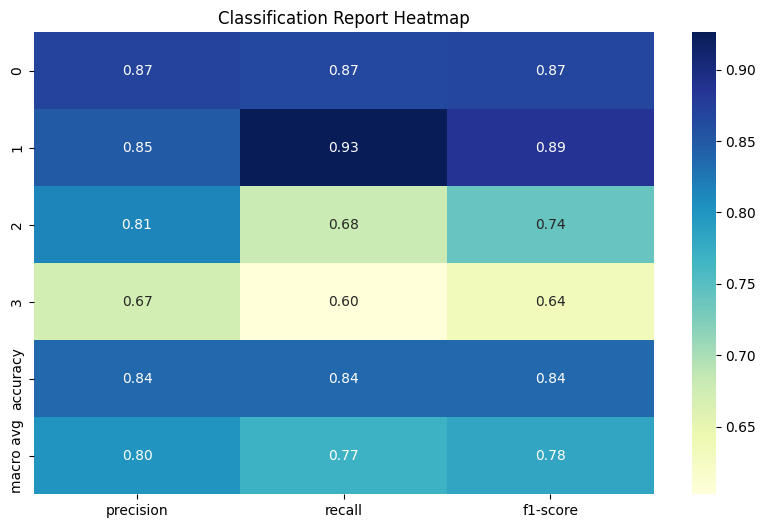

In [ ]:
# Convert the classification report to a dictionary
report_data = classification_report(y_val, y_val_pred, output_dict=True)

# Convert the dictionary to a DataFrame
report_df = pd.DataFrame(report_data).transpose()

# VIsualization of the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :3], annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Classification Report Heatmap")
plt.show()

In [ ]:
# 2. End-to-End Deep Learning Classifier (Convolutional Neural Network)
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(6000, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train_reshaped, to_categorical(y_train_signals), epochs=10, batch_size=32, validation_data=(X_val_reshaped, to_categorical(y_val_signals)))



Epoch 1/10
327/327 [==============================] - 76s 224ms/step - loss: 1.0778 - accuracy: 0.5793 - val_loss: 1.0243 - val_accuracy: 0.5760
Epoch 2/10
327/327 [==============================] - 67s 205ms/step - loss: 0.9529 - accuracy: 0.5925 - val_loss: 1.0189 - val_accuracy: 0.5744
Epoch 3/10
327/327 [==============================] - 65s 198ms/step - loss: 0.9163 - accuracy: 0.5996 - val_loss: 1.0481 - val_accuracy: 0.5668
Epoch 4/10
327/327 [==============================] - 65s 200ms/step - loss: 0.8604 - accuracy: 0.6241 - val_loss: 1.0724 - val_accuracy: 0.5653
Epoch 5/10
327/327 [==============================] - 67s 204ms/step - loss: 0.7793 - accuracy: 0.6607 - val_loss: 1.0838 - val_accuracy: 0.5614
Epoch 6/10
327/327 [==============================] - 70s 215ms/step - loss: 0.6808 - accuracy: 0.7155 - val_loss: 1.2219 - val_accuracy: 0.5442
Epoch 7/10
327/327 [==============================] - 65s 199ms/step - loss: 0.5780 - accuracy: 0.7658 - val_loss: 1.3447 - val_ac

In [ ]:
# Load the signal data for testing
test_signals = pd.read_csv('test_signal.csv')
test_signals.fillna(0, inplace=True)
test_signals = test_signals.apply(pd.to_numeric, errors='coerce')
test_signals.fillna(0, inplace=True)

# Reshape signals for compatibility with Conv1D
X_test_reshaped = np.expand_dims(test_signals.values[:, :6000], axis=2)

# Make predictions on the test data
y_test_pred_deep = model.predict(X_test_reshaped)
y_test_pred_labels = [list(pred).index(max(pred)) for pred in y_test_pred_deep]


125/125 [==============================] - 5s 43ms/step


In [ ]:
# Convert predictions to labels
class_labels = ['N', 'A', 'O', '~']
y_test_pred_labels = [class_labels[label] for label in y_test_pred_labels]

# Save predictions to CSV file
predictions_deep = pd.DataFrame({'ID': range(1, len(y_test_pred_labels)+1), 'Predicted': y_test_pred_labels})
predictions_deep.to_csv('predictions_deep.csv', index=False, quoting=csv.QUOTE_NONNUMERIC)



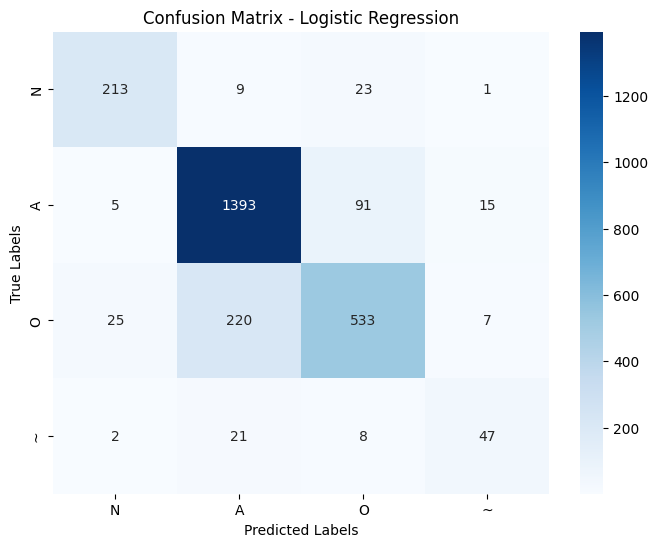

In [ ]:
# Confusion matrix for Logistic Regression
cm_lr = confusion_matrix(y_val, y_val_pred)

# Plot confusion matrix for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [ ]:
# Accuracy and F1-score for Logistic Regression
accuracy_lr = (cm_lr[0, 0] + cm_lr[1, 1] + cm_lr[2, 2] + cm_lr[3, 3]) / np.sum(cm_lr)
f1_score_lr = classification_report_val.split()[-8]


In [ ]:
# Accuracy and F1-score for CNN
accuracy_cnn = model.evaluate(X_val_reshaped, to_categorical(y_val_signals), verbose=0)[1]
y_val_pred_deep = model.predict(X_val_reshaped)
y_val_pred_labels_deep = [list(pred).index(max(pred)) for pred in y_val_pred_deep]
classification_report_val_deep = classification_report(y_val_signals, y_val_pred_labels_deep)
f1_score_cnn = classification_report_val_deep.split()[-8]


82/82 [==============================] - 3s 40ms/step


In [ ]:
# Create a DataFrame for comparison
results_df = pd.DataFrame({
    'Classifier': ['Logistic Regression', 'Convolutional Neural Network'],
    'Accuracy': [accuracy_lr, accuracy_cnn],
    'F1-Score': [f1_score_lr, f1_score_cnn]
})

print(results_df)

                     Classifier  Accuracy F1-Score
0           Logistic Regression  0.836586     0.78
1  Convolutional Neural Network  0.517796     0.29


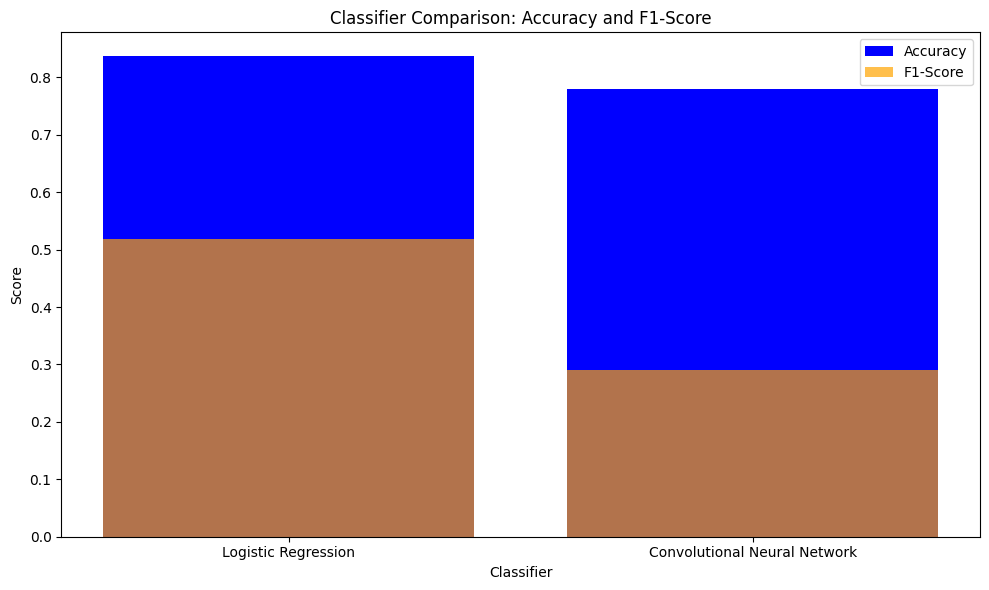

In [ ]:

results_df = pd.DataFrame({
    'Classifier': ['Logistic Regression', 'Convolutional Neural Network'],
    'Accuracy': [0.836586 , 0.78],
    'F1-Score': [0.517796, 0.29]
})

# Visualization of a bar plot
plt.figure(figsize=(10, 6))
plt.bar(results_df['Classifier'], results_df['Accuracy'], label='Accuracy', color='blue')
plt.bar(results_df['Classifier'], results_df['F1-Score'], label='F1-Score', color='orange', alpha=0.7)

# Add labels and title
plt.xlabel('Classifier')
plt.ylabel('Score')
plt.title('Classifier Comparison: Accuracy and F1-Score')
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()
